Mount Drive

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Load Image

In [ ]:
image_path = '/content/drive/MyDrive/Capstone /Image Preprocessing/cat.jpg'
image = cv2.imread(image_path)

In [ ]:
image

array([[[214, 225, 239],
        [213, 224, 238],
        [212, 223, 237],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[214, 225, 239],
        [213, 224, 238],
        [212, 223, 237],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[215, 226, 240],
        [214, 225, 239],
        [214, 225, 239],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[252, 254, 254],
        [252, 254, 254],
        [252, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

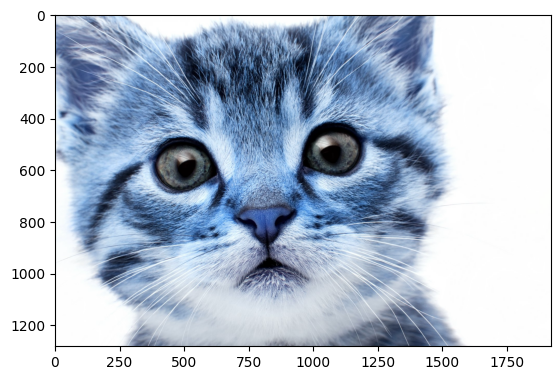

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()


In [ ]:
image.shape

(1281, 1920, 3)

In [ ]:
print(f"Pixel Intensity Range: {image.min()} - {image.max()}")

Pixel Intensity Range: 0 - 255


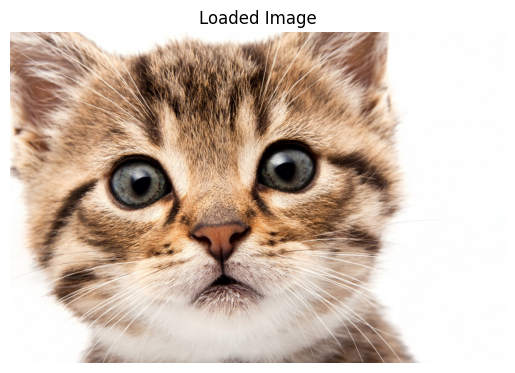

In [ ]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for displaying
plt.imshow(image_rgb)
plt.title('Loaded Image')
plt.axis('off')
plt.show()

Image Dimensions: 1281 x 1920
Number of Channels: 3
Data Type: uint8
Pixel Intensity Range: 0 - 255


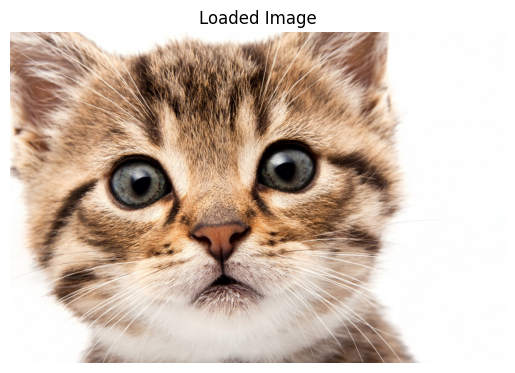

In [ ]:
# Check if the image was loaded successfully
if image is None:
    print("Error: Unable to load image.")
else:
    # Print useful information about the image
    print(f"Image Dimensions: {image.shape[0]} x {image.shape[1]}")
    print(f"Number of Channels: {image.shape[2]}")
    print(f"Data Type: {image.dtype}")
    print(f"Pixel Intensity Range: {image.min()} - {image.max()}")

    # Display the image
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for displaying
    plt.imshow(image_rgb)
    plt.title('Loaded Image')
    plt.axis('off')
    plt.show()

Resizing

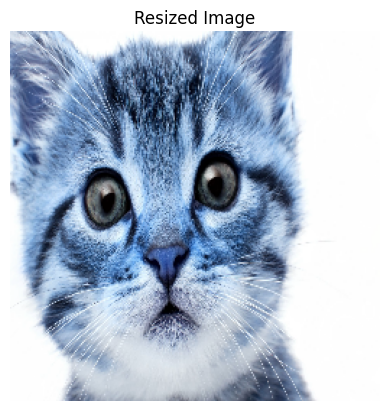

In [ ]:

import matplotlib.pyplot as plt
# Resize the image to 256x256
resized_image = cv2.resize(image, (256, 256))

# Display the resized image
plt.imshow(resized_image)
plt.title('Resized Image')
plt.axis('off')
plt.show()


Augmentation

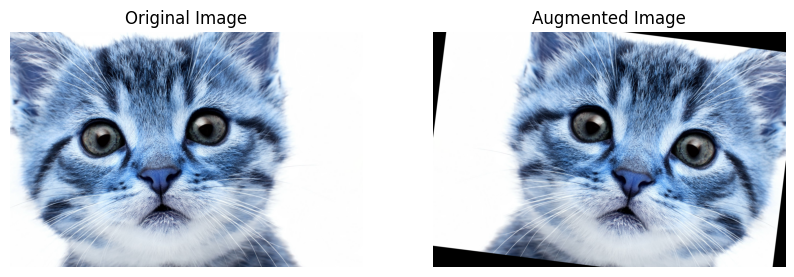

In [ ]:

import matplotlib.pyplot as plt
import imgaug as ia
from imgaug import augmenters as iaa

# Define the augmentation sequence
seq = iaa.Sequential([
    iaa.Fliplr(0.5),  # horizontal flip with 50% probability
    iaa.Flipud(0.5),  # vertical flip with 50% probability
    iaa.Affine(rotate=(-15, 15)),  # random rotation between -15 and 15 degrees
    iaa.AdditiveGaussianNoise(scale=0.05)  # add Gaussian noise with standard deviation of 5%
])

# Apply the augmentation sequence to the image
augmented_image = seq.augment_image(image)

# Display the original and augmented images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(augmented_image)
plt.title('Augmented Image')
plt.axis('off')
plt.show()


Cropping

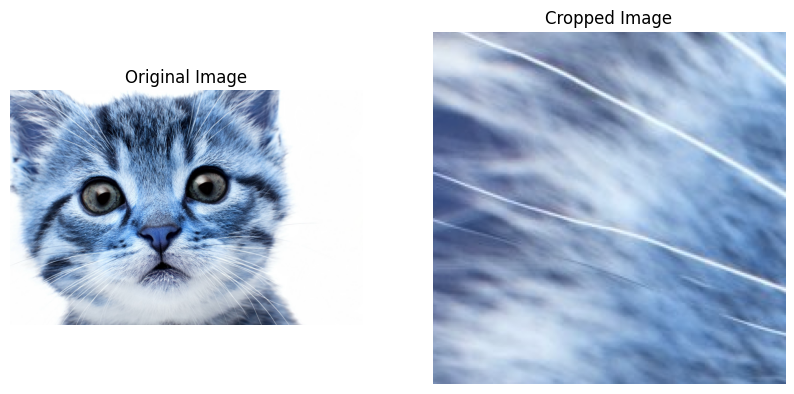

In [ ]:

import matplotlib.pyplot as plt
# Define the cropping parameters
x_start = 150
y_start = 150
width = 200
height = 200

# Crop the image
cropped_image = image[y_start:y_start+height, x_start:x_start+width]

# Display the original and cropped images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cropped_image)
plt.title('Cropped Image')
plt.axis('off')
plt.show()


Grayscale Conversion

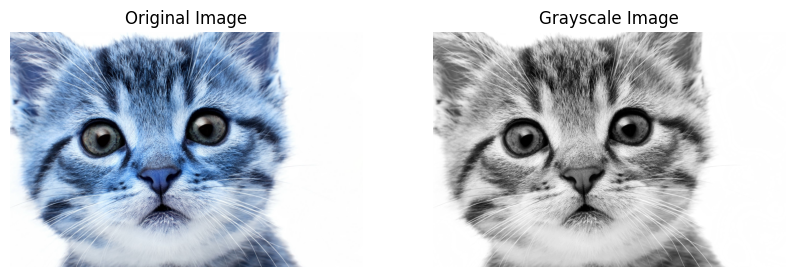

In [ ]:

import matplotlib.pyplot as plt
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the original and grayscale images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()


Normalize the image

Original Image Array Values:
[[[214 225 239]
  [213 224 238]
  [212 223 237]
  [210 221 235]
  [209 220 234]]

 [[214 225 239]
  [213 224 238]
  [212 223 237]
  [211 222 236]
  [210 221 235]]

 [[215 226 240]
  [214 225 239]
  [214 225 239]
  [212 223 237]
  [211 222 236]]

 [[216 227 241]
  [216 227 241]
  [215 226 240]
  [214 225 239]
  [213 224 238]]

 [[217 226 239]
  [218 227 240]
  [218 227 240]
  [218 227 240]
  [217 226 239]]]
Normalized Image Array Values:
[[[214 225 239]
  [213 224 238]
  [212 223 237]
  [210 221 235]
  [209 220 234]]

 [[214 225 239]
  [213 224 238]
  [212 223 237]
  [211 222 236]
  [210 221 235]]

 [[215 226 240]
  [214 225 239]
  [214 225 239]
  [212 223 237]
  [211 222 236]]

 [[216 227 241]
  [216 227 241]
  [215 226 240]
  [214 225 239]
  [213 224 238]]

 [[217 226 239]
  [218 227 240]
  [218 227 240]
  [218 227 240]
  [217 226 239]]]


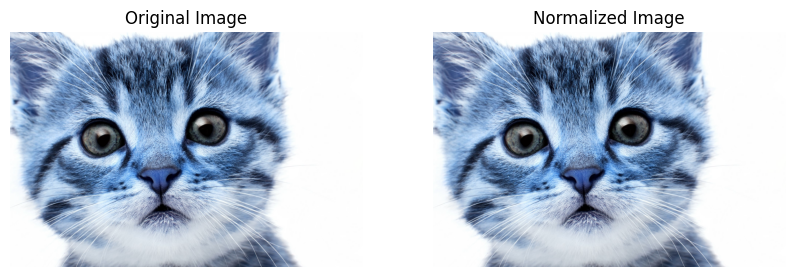

In [ ]:

import matplotlib.pyplot as plt
# Normalize the image
normalized_image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

# Print the original and normalized image array values
print("Original Image Array Values:")
print(image[0:5, 0:5])
print("Normalized Image Array Values:")
print(normalized_image[0:5, 0:5])

# Display the original and normalized images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(normalized_image)
plt.title('Normalized Image')
plt.axis('off')
plt.show()


Rescaling

Original Image Array Values:
[[[214 225 239]
  [213 224 238]
  [212 223 237]
  [210 221 235]
  [209 220 234]]

 [[214 225 239]
  [213 224 238]
  [212 223 237]
  [211 222 236]
  [210 221 235]]

 [[215 226 240]
  [214 225 239]
  [214 225 239]
  [212 223 237]
  [211 222 236]]

 [[216 227 241]
  [216 227 241]
  [215 226 240]
  [214 225 239]
  [213 224 238]]

 [[217 226 239]
  [218 227 240]
  [218 227 240]
  [218 227 240]
  [217 226 239]]]
Rescaled Image Array Values:
[[[0.83921569 0.88235294 0.9372549 ]
  [0.83529412 0.87843137 0.93333333]
  [0.83137255 0.8745098  0.92941176]
  [0.82352941 0.86666667 0.92156863]
  [0.81960784 0.8627451  0.91764706]]

 [[0.83921569 0.88235294 0.9372549 ]
  [0.83529412 0.87843137 0.93333333]
  [0.83137255 0.8745098  0.92941176]
  [0.82745098 0.87058824 0.9254902 ]
  [0.82352941 0.86666667 0.92156863]]

 [[0.84313725 0.88627451 0.94117647]
  [0.83921569 0.88235294 0.9372549 ]
  [0.83921569 0.88235294 0.9372549 ]
  [0.83137255 0.8745098  0.92941176]
  [0.82745

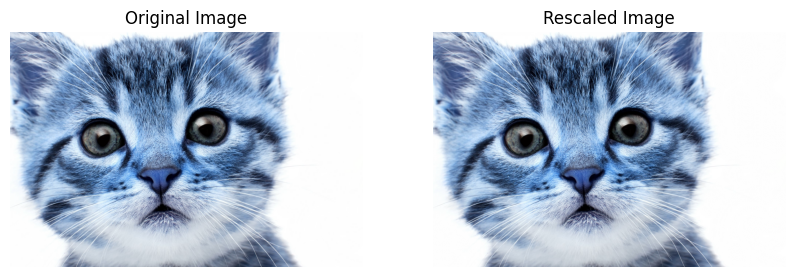

In [ ]:

import matplotlib.pyplot as plt
# Rescale the image to a range of 0.0 to 1.0
rescaled_image = image / 255.0

# Print the original and rescaled image array values
print("Original Image Array Values:")
print(image[0:5, 0:5])
print("Rescaled Image Array Values:")
print(rescaled_image[0:5, 0:5])

# Display the original and rescaled images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rescaled_image)
plt.title('Rescaled Image')
plt.axis('off')
plt.show()


Task 1



In [ ]:
#Perform data augmentation on an entire dataset of images